# Importar las librerias

In [1]:
# Importación de librerias para manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

# Geoespacial
import folium
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from folium.plugins import HeatMap

# Preprocesado
from datetime import datetime
import itertools
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Warnings
import warnings
warnings.filterwarnings('ignore')
# Ver todas las columnas
pd.set_option('display.max_columns', None)

# Importar los datos

In [2]:
train = pd.read_csv(r"C:\Users\josea\Desktop\training_set.csv")
labels = pd.read_csv(r"C:\Users\josea\Desktop\set_labels.csv")
test = pd.read_csv(r"C:\Users\josea\Desktop\test_set.csv")




Procedemos a la union del dataset de entrenamiento y de la variable objetivo

In [3]:
df = pd.merge(train,labels,on='id')

In [4]:
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin    subvillage       region  region_code  \
0                   Lake Nyasa      Mnyusi B       Iringa           11   
1                Lake Victoria       Nyamara         Mara           20   
2                      Pangani       Majengo      Manyara           21   
3      Ruvuma / Southern Coast    Mahakamani       Mtwara           90   
4                Lake Victoria    Kyanyamisa       Kagera           18   
...                        ...           ...          ...          ...   
59395                  Pangani      Kiduruni  Kilimanjaro            3   
59396                   Rufiji      Igumbilo       Iringa           11   
59397                   Rufiji     Madungulu        Mbeya           12   
59398                   Rufiji        Mwinyi       Dodoma            1   
59399              Wami / Ruvu  Kikatanyemba     Morogoro            5   

       district_code             lga              ward  population  \
0                  5          Ludewa          Mundindi         109   
1                  2       Serengeti             Natta         280   
2                  4       Simanjiro           Ngorika         250   
3                 63        Nanyumbu          Nanyumbu          58   
4                  1         Karagwe        Nyakasimbi           0   
...              ...             ...               ...         ...   
59395              5             Hai  Masama Magharibi         125   
59396              4          Njombe            Ikondo          56   
59397              7         Mbarali           Chimala           0   
59398              4        Chamwino      Mvumi Makulu           0   
59399              2  Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management  \
0               True  GeoData Consultants Ltd               VWC   
1                NaN  GeoData Consultants Ltd             Other   
2               True  GeoData Consultants Ltd               VWC   
3               True  GeoData Consultants Ltd               VWC   
4               True  GeoData Consultants Ltd               NaN   
...              ...                      ...               ... 

**Descripcion de variables numericas**


In [5]:
train.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [6]:
train.select_dtypes(exclude='number').describe()

date_recorded                  funder installer wpt_name  \
count          59400                   55763     55745    59398   
unique           356                    1896      2145    37399   
top       2011-03-15  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  \
count           59400      59029   59400   59400  59400          56066   
unique              9      19287      21     125   2092              2   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True   
freq            10248        508    5294    2503    307          51011   

                    recorded_by scheme_management scheme_name permit  \
count                     59400             55522       30590  56344   
unique                        1                11        2695      2   
top     GeoData Consultants Ltd               VWC           K   True   
freq                      59400             36793         682  38852   

       extraction_type extraction_type_group extraction_type_class management  \
count            59400                 59400                 59400      59400   
unique              18                    13                     7         12   
top            gravity               gravity               gravity        vwc   
freq             26780                 26780                 26780      40507   

       management_group    payment payment_type water_quality quality_group  \
count             59400      59400        59400         59400         59400   
unique                5          7            7             8             6   
top          user-group  never pay    never pay          soft          good   
freq              52490      25348        25348         50818         50818   

       quantity quantity_group  source source_type source_class  \
count     59400          59400   59400       59400        59400   
unique        5              5      10           7            3   
top      enough         enough  spring      spring  groundwater   
freq      33186          33186   17021       17021        45794   

           waterpoint_type waterpoint_type_group  
count                59400                 59400  
unique                   7                     6  
top     communal standpipe    communal standpipe  
freq                 28522                 34625

Por medio de una funcion observaremos mejor tanto las variables numericas como categoricas por medio de graficos en funcion a su comportamiento con la variable objetivo :

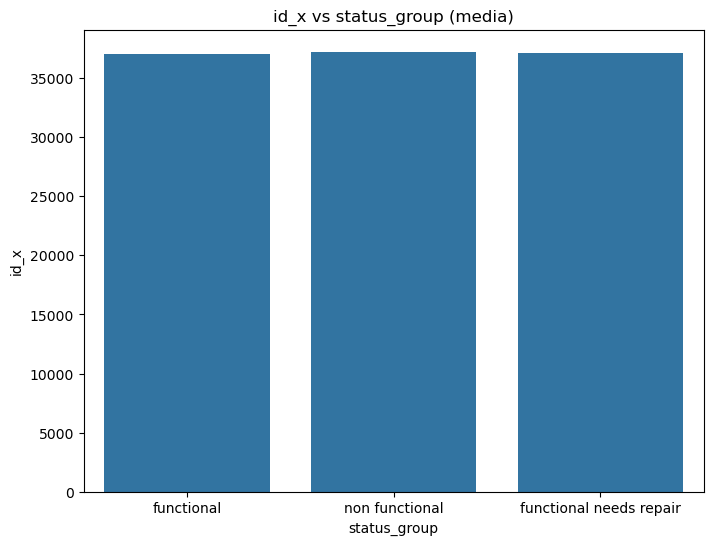

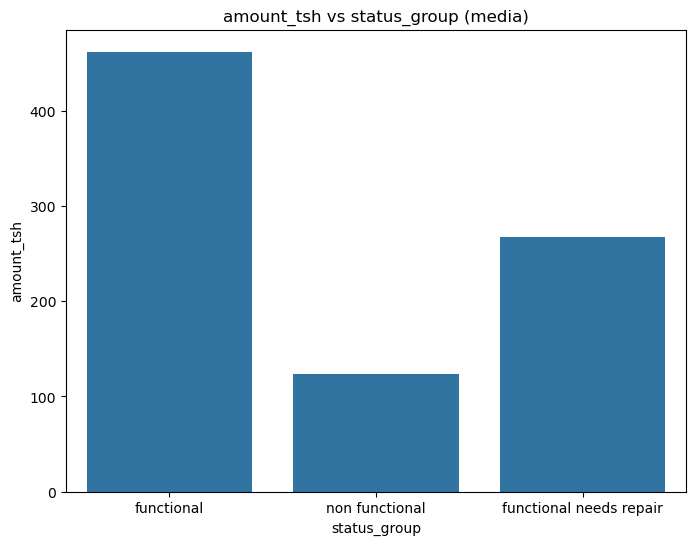

Saltando date_recorded por que tiene 356 valores unicos
Saltando funder por que tiene 1896 valores unicos


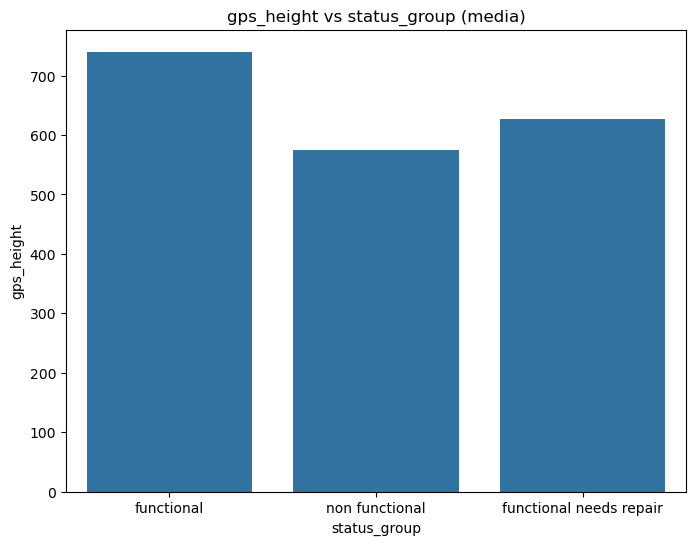

Saltando installer por que tiene 2145 valores unicos


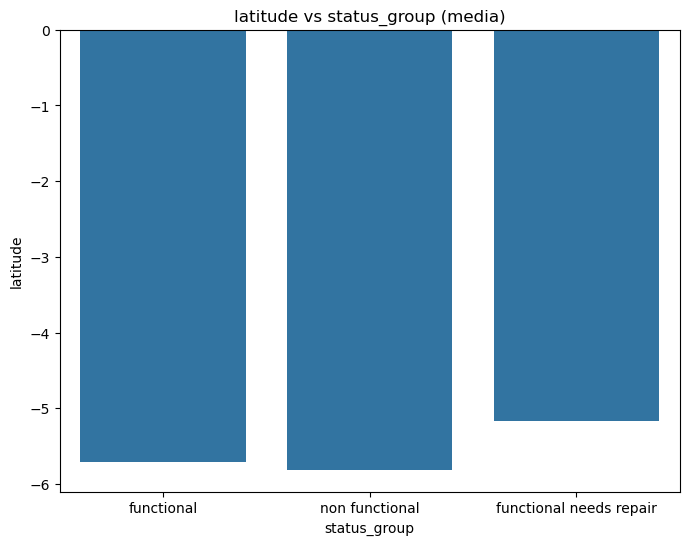

Saltando wpt_name por que tiene 37399 valores unicos


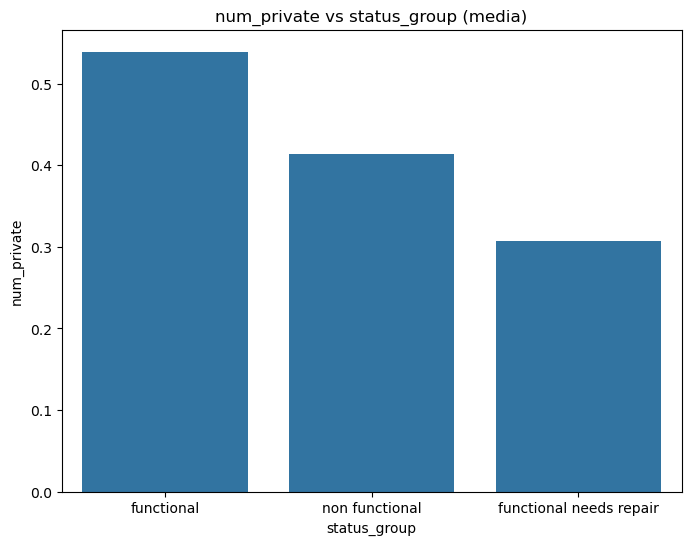

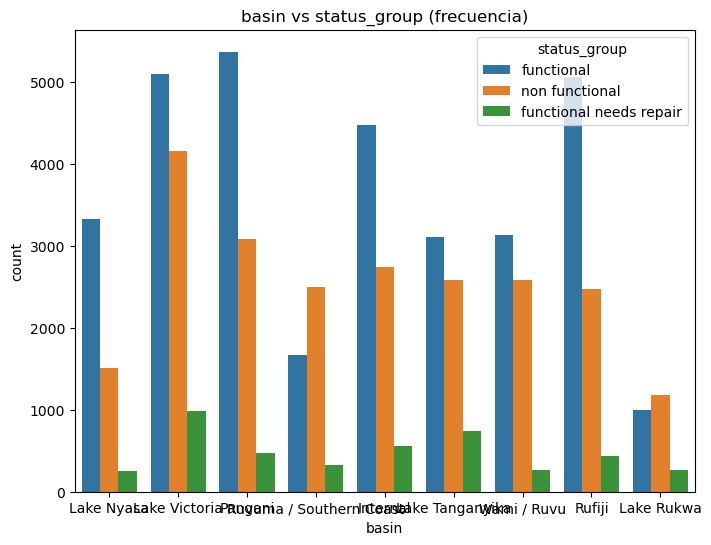

Saltando subvillage por que tiene 19287 valores unicos
Saltando region por que tiene 21 valores unicos


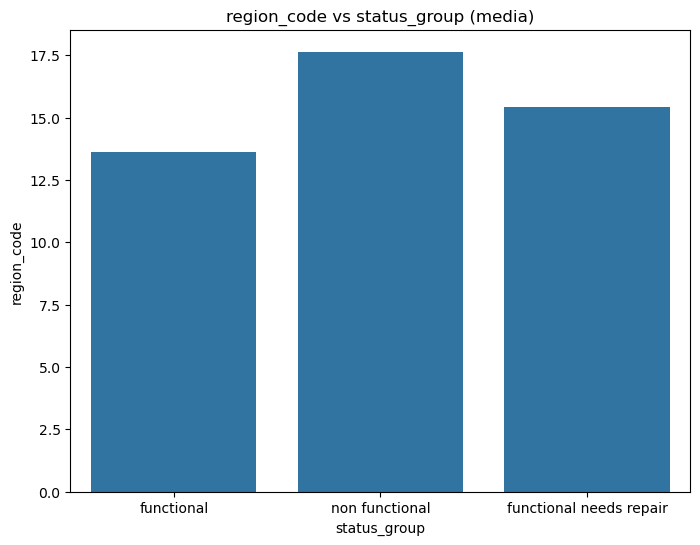

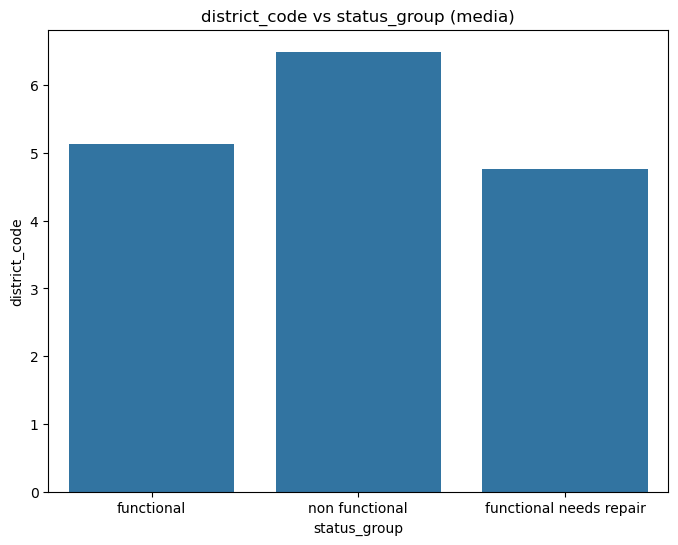

Saltando lga por que tiene 125 valores unicos
Saltando ward por que tiene 2092 valores unicos


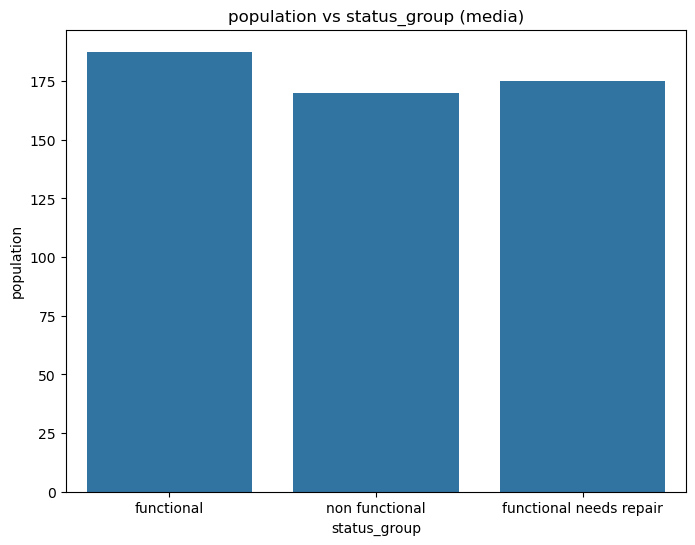

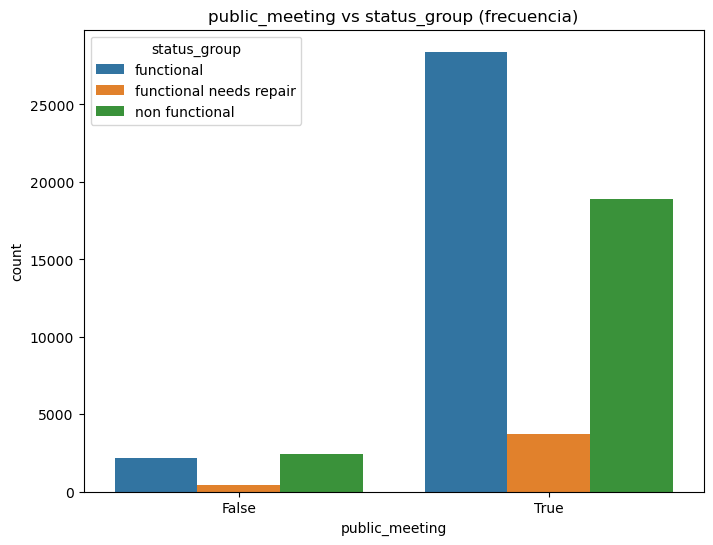

Saltando scheme_management por que tiene 11 valores unicos
Saltando scheme_name por que tiene 2695 valores unicos


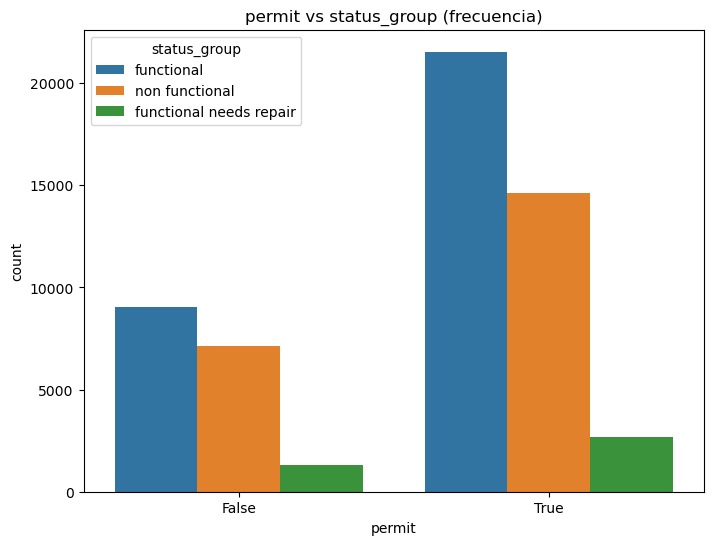

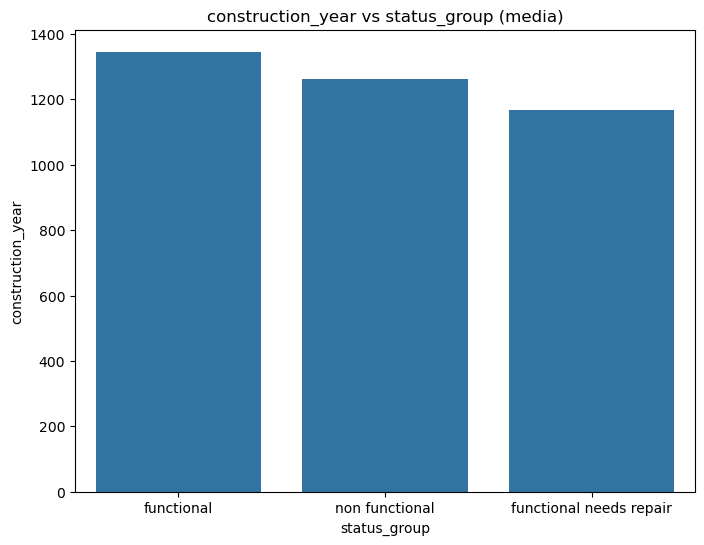

Saltando extraction_type por que tiene 18 valores unicos
Saltando extraction_type_group por que tiene 13 valores unicos


Saltando management por que tiene 12 valores unicos


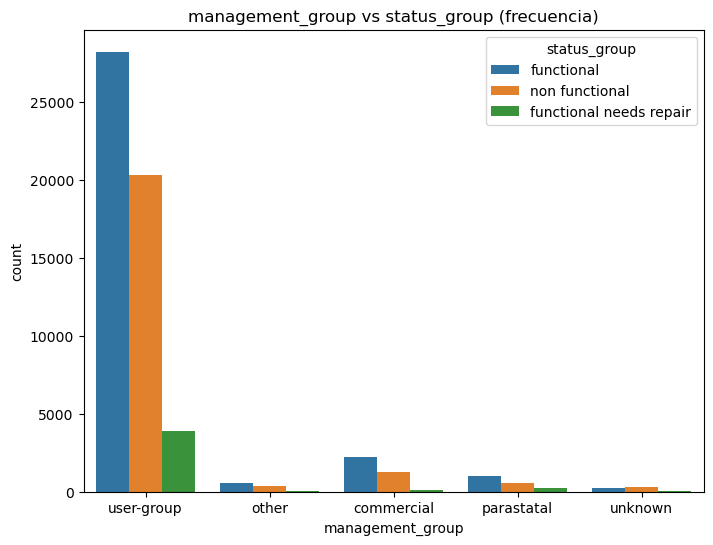

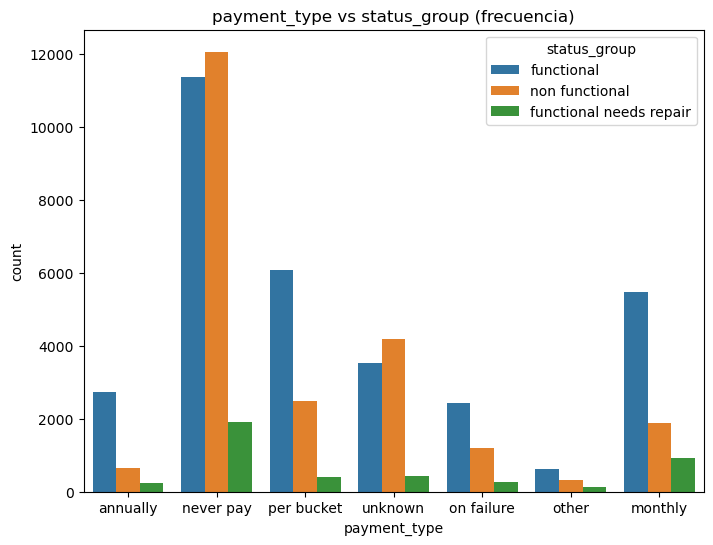

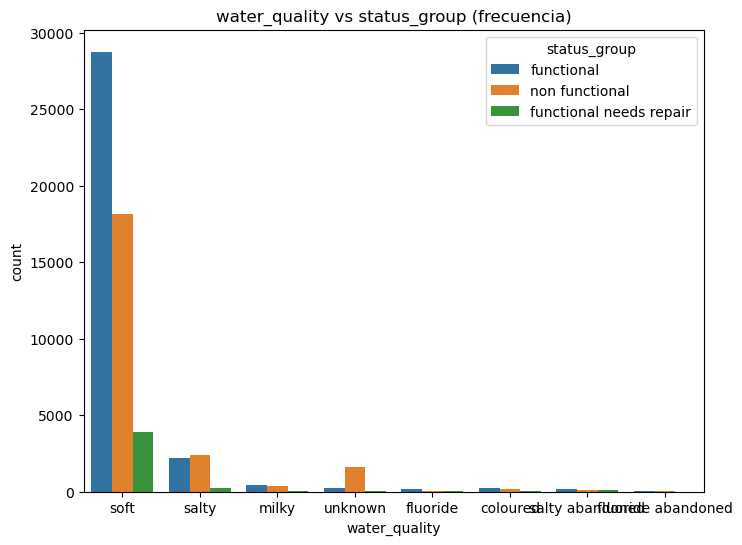

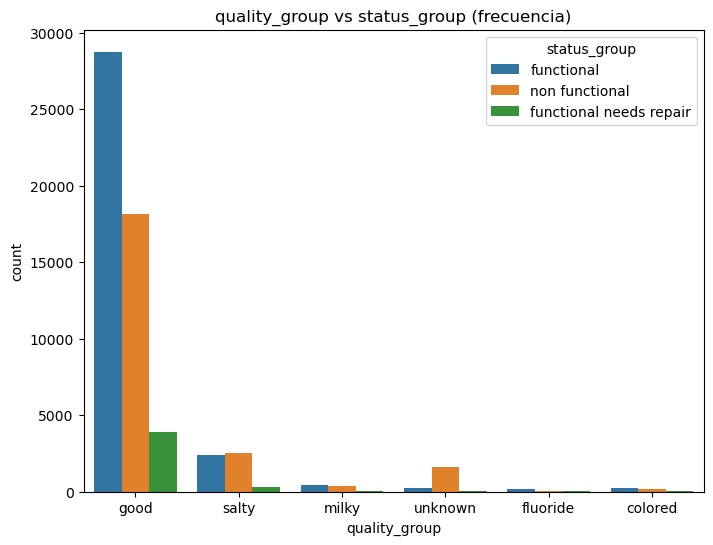

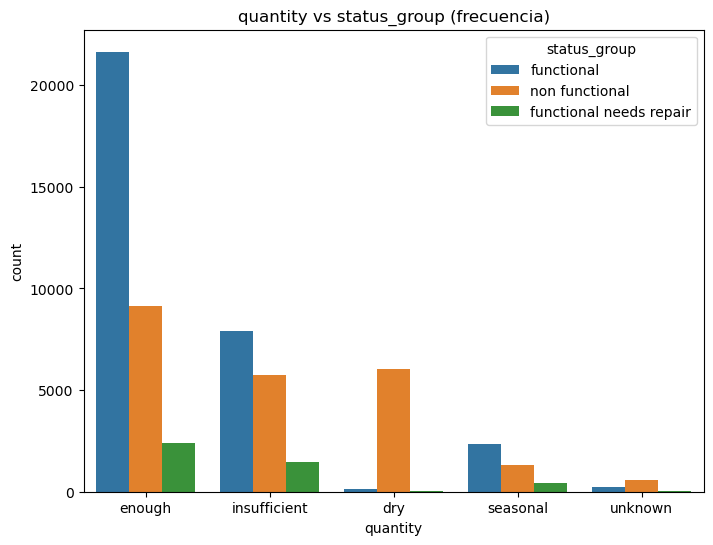

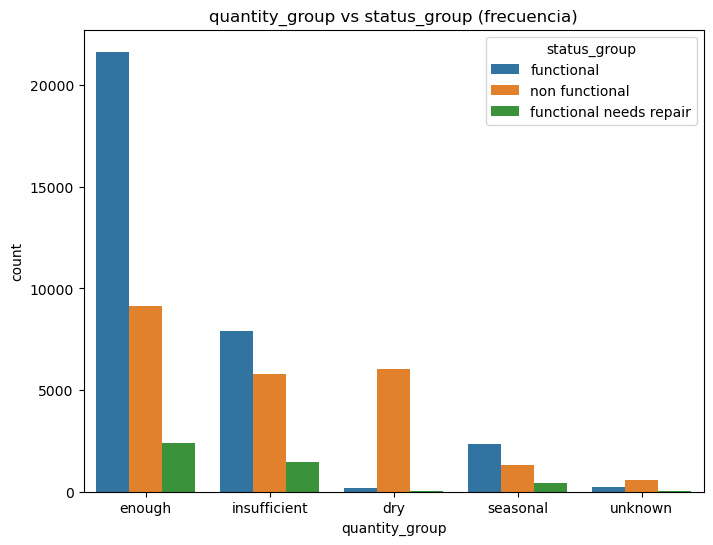

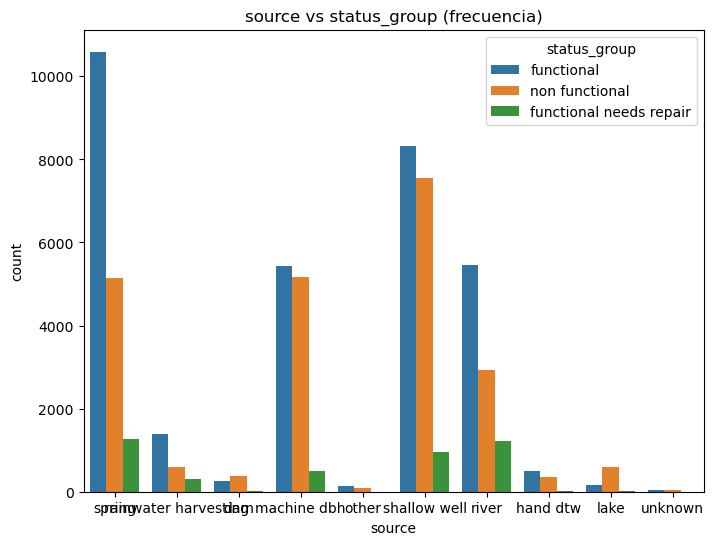

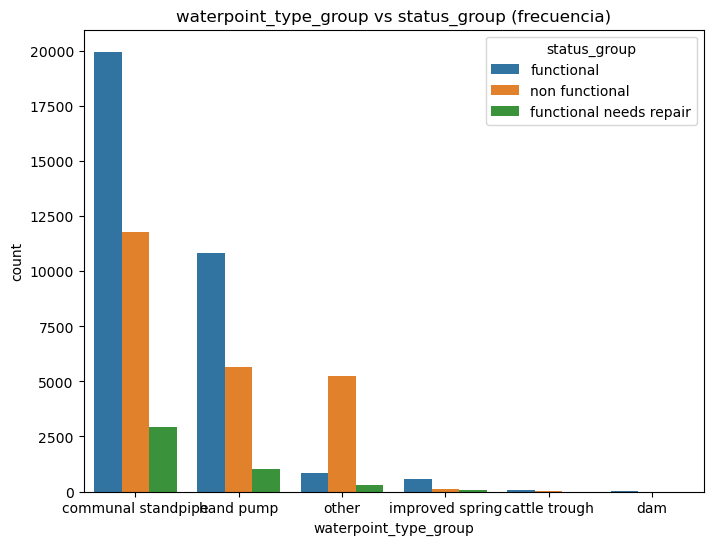

<Figure size 800x600 with 0 Axes>

In [7]:
dfmerge = pd.merge(train, labels, left_index=True, right_index=True)
def plot_variable_vs_target(df, target):
    variables = df.columns[df.columns != target]
    for var in variables:
         if df[var].dtype == 'object':
             if df[var].nunique() > 10:
                 print(f'Saltando {var} por que tiene {df[var].nunique()} valores unicos')
                 continue
             fig, ax = plt.subplots(figsize=(8,6))
             sns.countplot(x=var, hue=target, data=df, ax=ax)
             plt.title(f'{var} vs {target} (frecuencia)')
             plt.show()
         else:
             fig, ax = plt.subplots(figsize=(8,6))
             sns.barplot(x=target, y=var, data=df, estimator=np.mean, ci=None, ax=ax)
             plt.title(f'{var} vs {target} (media)')
             plt.show()
    plt.tight_layout()

plot_variable_vs_target(dfmerge, 'status_group');

# Visualizacion Geoespacial

In [8]:
import folium
from folium.plugins import HeatMap


df_clean = df.dropna(subset=['latitude', 'longitude'])


gradient = {
    '0.2': 'blue',
    '0.4': 'purple',
    '0.6': 'orange',
    '1.0': 'red'
}


m = folium.Map(
    location=[df_clean.latitude.mean(), df_clean.longitude.mean()],
    zoom_start=6
)


HeatMap(
    data=df_clean[['latitude', 'longitude']],
    radius=8,
    gradient=gradient
).add_to(m)


m


In [9]:
HeatMap(
    data=df_clean[['latitude', 'longitude']],
    radius=8
).add_to(m)

m


Visualizacion espacial como clusters

In [10]:
from folium.plugins import FastMarkerCluster
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))
map1 = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=6)
FastMarkerCluster(data=locations).add_to(map1)
map1

# Transformacion de datos

Algunas de las variables dentro del dataset seran modificadas para transformar su tipo de dato al correcto como es el caso de las fechas en date_recorded y de las regiones y distritos que contienen numeros pero funcionan como variables categorias :

In [11]:
# Pasarlo a datetime
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
# Pasar de variables numericas a categoricas
df['region_code'] = df['region_code'].astype('object')
df['district_code'] = df['region_code'].astype('object')

Es cierto que la fecha al ser un rango de valores tampoco aporta mucho como valor categorico ni como numerico en si debido al formato YYYY-MM-DD por lo tanto escalaremos los datos para poder tener una variable numerica que pueda ser usada en el modelo final :

In [12]:
from datetime import datetime
fecha = pd.to_datetime('2014-01-01') # Fecha de uno de los registros
df['fecha_esc'] = df['date_recorded'].apply(lambda x: (fecha - x).days / 365.25)
df = df.drop(['date_recorded'],axis=1) # Elimino la variable anterior del dataset
df.fecha_esc

0        2.803559
1        0.824093
2        0.848734
3        0.925394
4        2.472279
           ...   
59395    0.665298
59396    2.655715
59397    2.726899
59398    2.819986
59399    2.778919
Name: fecha_esc, Length: 59400, dtype: float64

# Eliminacion de variables
Debido  a que algunas variables estan repetidas con otro nombre o que no son significativas, nos vemos forzados a eliminar para el modelo final algunas de las variables del dataset :

In [13]:
df.amount_tsh.value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

La variable amount_tsh con 41639 valores con un 0 cosa que representa el 70.09% de las variables es claramente una de las variables a eliminar.

In [14]:
df.num_private.value_counts()

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

num_private es otra de las variables a eliminar debido a un alto porcentaje de 0.

In [15]:
df.recorded_by.value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

Otra de las variables a eliminar es **recorded_by** debido a que es uniforme en sus datos es decir la variable presenta siempre el mismo valor, **GeoData Consultants Ltd**

# Valores nulos o NaNs

In [16]:
null_values = (df.isnull().mean() * 100).reset_index()
null_values = null_values[(null_values[0] > 0)]
null_values

index          0
2              funder   6.122896
4           installer   6.153199
7            wpt_name   0.003367
10         subvillage   0.624579
17     public_meeting   5.612795
19  scheme_management   6.528620
20        scheme_name  48.501684
21             permit   5.144781

Observamos como algunas variables presentan un numero razonable de valores NaNs alrededor del 5-6% , sin embargo la variable scheme_name presenta alrededor de 48% por lo tanto se procedera a su eliminacion.

El resto de variables sus valores faltantes seran imputados por la moda :

In [17]:
variabels_imputacion= ['funder','installer','subvillage','public_meeting','scheme_management','permit'] # variables observadas con valores faltantes de alrededor del 5-6%
for var in variabels_imputacion:
    df[var] = df[var].fillna(df[var].mode().iloc[0])

Para variables como construction_year y population que cuentan con un gran numero de 0, se imputaran valores por medio de la mediana :

In [18]:
df = df.set_index('id')

In [19]:
# Reemplazo / Imputo los valores cero con la media
df['construction_year'] = df['construction_year'].replace(0, int(df.construction_year[df.construction_year!=0].median()))
df['population'] = df['population'].replace(0, int(df.population[df.population!=0].median()))

# Eliminacion de variables

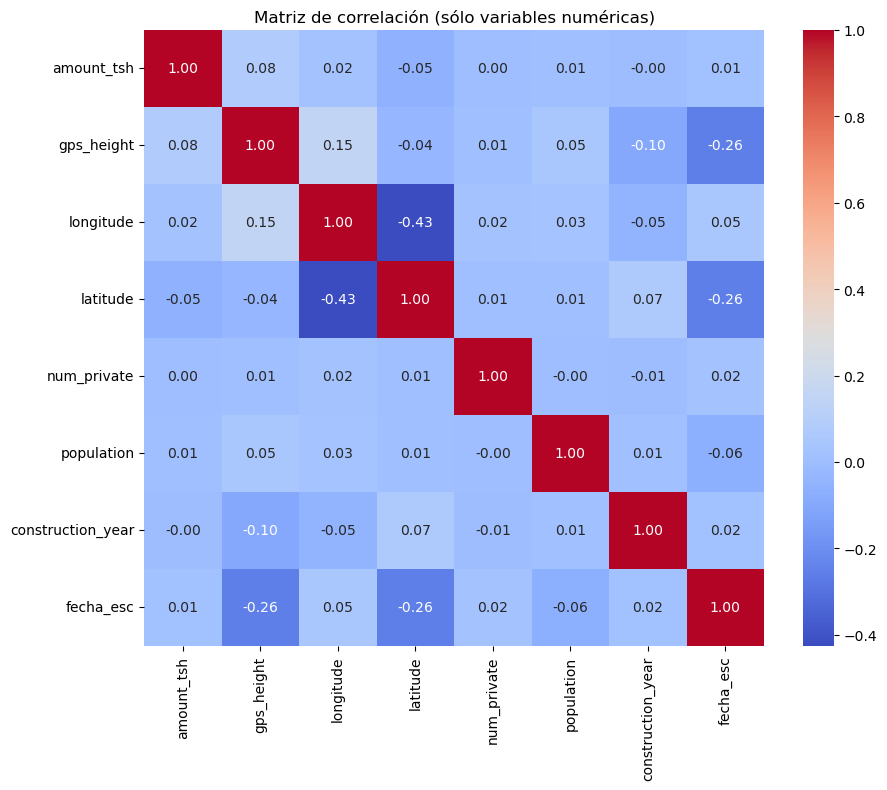

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Creamos un DataFrame que contenga únicamente las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# 2) Calculamos la matriz de correlación de esas columnas numéricas
corr_matrix = df_numeric.corr()

# 3) Dibujamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de correlación (sólo variables numéricas)")
plt.show()


In [21]:
# Si quieres verlo en Jupyter sin `plt.figure()/plt.show()`, basta con:
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')


<Axes: >

In [22]:
df.drop(['amount_tsh', 'num_private','recorded_by','scheme_name','source_type','source_class','waterpoint_type_group','quantity_group','payment_type','water_quality','management_group','extraction_type_group','extraction_type_class','region','region_code','lga','basin'], axis=1,inplace=True)

Las siguientes variables fueron eliminadas por una alta correlacion entre ellas debido a que despues generarian un problema de multi colinealidad.

*   source_type
*   source_class
*   waterpoint_type_group
*   quantity_group
*   payment_type
*   water_quality
*   management_group
*   extraction_type_group
*   extraction_type_class
*   region
*   region_code
*   lga
*   basin



# Escalacion de datos y sustitucion de 0 y 1

In [23]:
# Para variables con mas de 10 valores unicos creacion de dummies y escalado
for col in df.drop('status_group',axis=1).columns: # Iterando en cada columna del dataframe
    if df[col].dtype == 'object' and len(df[col].unique()) < 10:
        dummy_df = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummy_df], axis=1)
        df = df.drop(col, axis=1)

Para columnas con valores booleanos se hace la sustitucion de valores True y False por 0 y 1.

In [24]:
binary = ['public_meeting','permit']
for col in binary:
    df[col] = df[col].astype(int)

Para el resto de variables se procedera con la utilizacion de LabelEncoder :

In [25]:
le = LabelEncoder()
cat_vars = df.select_dtypes(include='object') # Para las variables categoricas
df = df.copy()
for var in cat_vars:
    df[var] = le.fit_transform(df[var])

# Particion training-test

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df.drop('status_group', axis=1)
y_train = train_df['status_group']
X_test = test_df.drop('status_group', axis=1)
y_test = test_df['status_group']

# Probamos los tamaños de test y de train
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(47520, 43)
(47520,)
(11880, 43)
(11880,)


# Seleccion de modelos
A continacion se procedera a la prueba de muchos modelos de clasificacion para observar cual de ellos se ajusta mejor a nuestro modelo a traves de la metrica **accuracy score**,

In [27]:
# MODELO 1: Regresión Logística
logreg = LogisticRegression(random_state=42, multi_class='multinomial') ## Muy importante
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"1. Regresión Logística Accuracy score: {accuracy}")
# MODELO 2: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred2 = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f"2. Naive Baye Accuracy score: {accuracy}")
# MODELO 3: Random Forest
rfc = RandomForestClassifier(n_estimators=150, random_state=42)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(f"3. Random Forest Accuracy score: {accuracy}")
# MODELO 4: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print(f"4. K-Nearest Neighbors Accuracy score: {accuracy}")
# MODELO 5: Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred5 = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
print(f"5. Gradient Boosting Accuracy score: {accuracy}")
# MODELO 6: XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred6 = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred6)
print("6. XGBoost Accuracy:", accuracy)


1. Regresión Logística Accuracy score: 0.5416666666666666
2. Naive Baye Accuracy score: 0.6903198653198653
3. Random Forest Accuracy score: 0.8132996632996633
4. K-Nearest Neighbors Accuracy score: 0.5340909090909091
5. Gradient Boosting Accuracy score: 0.7513468013468013
6. XGBoost Accuracy: 0.8033670033670034


Los 2 mejores resultados de un primer test de modelos son :
* Random Forest Accuracy score: 0.8137205387205387
* XGBoost Accuracy: 0.8011784511784512

# Prueba en el X_test
Prosegimos siguiendo el mismo procesa para el dataset de prueba/test.

In [28]:
df_test = test

In [29]:
# Pasarlo a datetime
df_test['date_recorded'] = pd.to_datetime(df_test['date_recorded'])
# Pasar de variables numericas a categoricas
df_test['region_code'] = df_test['region_code'].astype('object')
df_test['district_code'] = df_test['region_code'].astype('object')

In [30]:
from datetime import datetime
fecha = pd.to_datetime('2014-01-01') # Fecha de uno de los registros
df_test['fecha_esc'] = df_test['date_recorded'].apply(lambda x: (fecha - x).days / 365.25)
df_test = df_test.drop(['date_recorded'],axis=1) # Elimino la variable anterior del dataset

In [31]:
variabels_imputacion= ['funder','installer','subvillage','public_meeting','scheme_management','permit'] # variables observadas con valores faltantes de alrededor del 5-6%
for var in variabels_imputacion:
    df_test[var] = df_test[var].fillna(df_test[var].mode().iloc[0])

In [32]:
# Reemplazo / Imputo los valores cero con la media
df_test['construction_year'] = df_test['construction_year'].replace(0, int(df_test.construction_year[df_test.construction_year!=0].median()))
df_test['population'] = df_test['population'].replace(0, int(df_test.population[df_test.population!=0].median()))

In [33]:
df_test.drop(['amount_tsh', 'num_private','recorded_by','scheme_name','source_type','source_class','waterpoint_type_group','quantity_group','payment_type','water_quality','management_group','extraction_type_group','extraction_type_class','region','region_code','lga','basin'], axis=1,inplace=True)

In [34]:
df_test = df_test.set_index('id')

In [35]:
# Para variables con mas de 10 valores unicos creacion de dummies y escalado
for col in df_test.columns: # Iterando en cada columna del dataframe
    if df_test[col].dtype == 'object' and len(df_test[col].unique()) < 10:
        dummy_df = pd.get_dummies(df_test[col], prefix=col)
        df_test = pd.concat([df_test, dummy_df], axis=1)
        df_test = df_test.drop(col, axis=1)

In [36]:
binary = ['public_meeting','permit']
for col in binary:
    df_test[col] = df_test[col].astype(int)

In [37]:
le = LabelEncoder()
cat_vars = df_test.select_dtypes(include='object') # Para las variables categoricas
for var in cat_vars:
    df_test[var] = le.fit_transform(df_test[var])

# Nueva Particion training-test

In [38]:
X_train = df.drop('status_group',axis=1)
y_train = df['status_group']
X_test = df_test

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(59400, 43)
(59400,)
(14850, 43)


# Prueba final en modelos Random Forest

In [40]:
y_train.value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

## Random Forest

In [41]:
rfc = RandomForestClassifier(n_estimators=150, random_state=42)
rfc.fit(X_train, y_train)
y_pred_new = rfc.predict(X_test)

In [42]:
# Exportar datos al CSV para ser subidos
X_test['status_group'] = y_pred_new
submission_xgb = pd.DataFrame(X_test['status_group'])
submission_xgb['status_group'] = submission_xgb['status_group'].replace({0: 'functional', 1: 'functional needs repair', 2: 'non functional'})
submission_xgb.to_csv('random_forest_jose123.csv',index=True)